## KNN

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. 

This classification algorithm based on 'distance'. Classification done by nearest **K** neighbours  

<img src = "http://www.saedsayad.com/images/KNN_similarity.png"/>

## How K changes decision boundry

<img src = "https://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/K-judgement2.png"/>

## Soooo easy. Let's implement it!

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der

#Separate
def dummy_data_one():
    x = np.array([
        [1, 1],
        [1, 2],
        [2.5, 3.3],
        [2.1, 1],
        [4, 3],

        [5.5, 6],
        [7.9, 5],
        [7.5, 10],
        [6, 5.5]
    ])

    y = np.array([
        1, 1, 1, 1, 1, 0, 0, 0, 0
    ])

    return x, y


def dummy_data_two():
    # #Radial
    x = np.array([
        [5, 5],
        [4, 5],
        [6, 5],
        [5, 6],
        [5, 4],

        [8.0, 8],
        [7.5, 6],
        [10, 8],
        
        [3, 2],
        [1, 1.5],
        [2.4, 2.2],
        
        [1, 6.5],
        [0.4, 9.2],
        [2.1, 10.2],
        
        [7, 3],
        [5.9, 2.2],
        [6.8, 2.2]
    ])

    y = np.array([
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ])
    
    return x, y

In [41]:
def plot_area(pts):
    for (x, y, color) in pts:
        plt.plot(x, y, 's', color = color)    

def plot(x, y, bound = None):
    if bound:
        plot_area(bound)
        
    plt.plot(x[np.where(y == 0)][0:, 0], x[np.where(y == 0)][0:, 1], 'wx', markersize = 8)
    plt.plot(x[np.where(y == 1)][0:, 0], x[np.where(y == 1)][0:, 1], 'wo', markersize = 8)
    plt.show()

def normalize(x):
    res = x
    for i in range(x.shape[1]):
        res[:,i] = x[:,i] / x[:,i].max()
    return res

In [47]:
x, y = dummy_data_two()
x = normalize(x)


In [48]:
#Define distance function
def compute_distance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

In [52]:
#Find closest for x_test from dataset X with labels Y, with K nearest
def find_closest(x_test, x, y, k = 3):
    res = []
    for row in x_test:
        distances = np.array([compute_distance(row, x[i]) for i in range(len(x))])
        closest_labels = y[np.argsort(distances)[:k]]
        prediction = np.argmax(np.bincount(closest_labels))
        res.append(prediction)
    
    return np.array(res)
    

In [53]:
#Plotting purposes
def form_area_marks(x, y):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    xs = np.arange(-0.1, 1.1, 0.02)
    ys = np.arange(-0.1, 1.1, 0.02)
    pts = []
    for i in xs:
        for j in ys:
            label = find_closest(np.array([[i, j]]), x, y)[0]
            pts.append((i, j, colors[label]))
    return pts
           
    

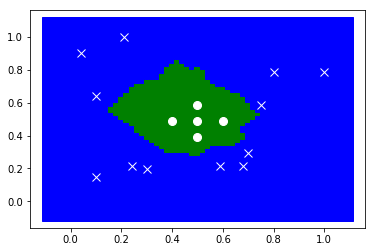

In [54]:
bound = form_area_marks(x, y)
plot(x, y, bound)

<img src = "https://memegenerator.net/img/instances/250x250/64104111/its-so-easy-a-baby-monkey-could-do-it.jpg">

## K means

K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Our goal is to find the K clusters that minimizes objective function J 
(‘ci’ is the number of data points in ith cluster. ‘c’ is the number of cluster centers)
<img src="https://sites.google.com/site/dataclusteringalgorithms/_/rsrc/1273047853039/k-means-clustering-algorithm/kmeans.JPG" />

Let's define algorithm:

Let  X = {x1,x2,x3,……..,xn} be the set of data points and V = {v1,v2,…….,vc} be the set of centers.


1) Randomly select ‘c’ cluster centers.


2) Calculate the distance between each data point and cluster centers.


3) Assign the data point to the cluster center whose distance from the cluster center is minimum of all the cluster centers..


4) Recalculate the new cluster center using:  
<img src="https://sites.google.com/site/dataclusteringalgorithms/_/rsrc/1273048565389/k-means-clustering-algorithm/kmeans1.bmp">

5) Recalculate the distance between each data point and new obtained cluster centers.


6) If no data point was reassigned then stop, otherwise repeat from step 3).


<img src ="http://static6.businessinsider.com/image/4f631d58ecad04f05e000043/nows-a-great-time-to-learn-to-code--heres-how-to-get-started-up-to-92-off.jpg"/>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der

def dummy_data_one():
    x = np.array([
        [1, 1],
        [1, 2],
        [2.5, 3.3],
        [2.1, 1],
        [2, 3],
        
        [1, 10],
        [2, 12],
        [3, 9],
        [2.5, 11],
        
        
        [7.5, 6],
        [7.9, 5],
        [7.5, 6.5],
        [8, 5.5]
    ])

    return x

def plot_area(pts):
    for (x, y, color) in pts:
        plt.plot(x, y, 's', color = color)    

def plot(x,bound = None, centroids = None):
    
    if bound:
        plot_area(bound)
        
    if centroids is not None:
        plt.plot(centroids[0:, 0], centroids[0:, 1], 'wo', markersize = 14)
    
    plt.plot(x[0:, 0], x[0:, 1], 'yx', markersize = 8)
    plt.show()

def normalize(x):
    res = x
    for i in range(x.shape[1]):
        res[:,i] = x[:,i] / x[:,i].max()
    return res

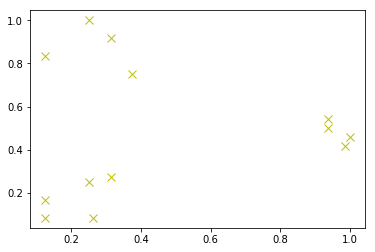

In [56]:
x = dummy_data_one()
x = normalize(x)
plot(x)

In [64]:
#Inititalize starting clusters
inits = np.array([[0.5, 0.5], [0.8, 0.8]])

In [65]:
def cluster_iter(centroids, x):
    size, features = x.shape
    cendroids_count = len(centroids)
    distances = np.array([np.sum(np.power(x - centroids[k], 2), axis = 1) for k in range(cendroids_count)]).T
    assigned_cenroids = np.array([np.argsort(distances[i])[0] for i in range(size)])
    updated = [x[assigned_cenroids == k].mean(axis = 0) for k in range(cendroids_count)]
    return np.array(updated)
        

In [66]:
def cluster(inits, x, niter = 100):
    centroids = inits
    for i in range(niter):
        prev = centroids
        centroids = cluster_iter(prev, x)
        if(np.all(centroids == prev)): 
            break

    return centroids

In [67]:
c = cluster(inits, x)

In [68]:
#Our predict function
def find_closest(centroids, x):
    distances = np.sum(np.power(centroids - x, 2),axis = 1)
    closest = np.argsort(distances)[0]
    return closest

In [69]:
def form_boundry(centroids):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    xs = np.arange(-0.1, 1.1, 0.02)
    ys = np.arange(-0.1, 1.1, 0.02)
    pts = []
    for i in xs:
        for j in ys:
            label = find_closest(centroids, np.array([i, j]))
            pts.append((i, j, colors[label]))
    return pts

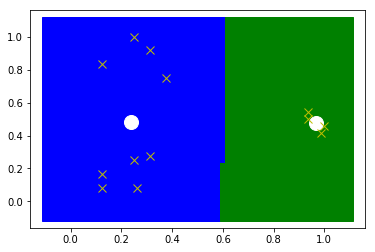

In [70]:
boundry = form_boundry(c)
plot(x, boundry, c)